## Imports

In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import nltk
nltk.download('vader_lexicon')
import datetime
import time
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from math import *
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fivos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Sentiment Analysis

In [2]:
dataset = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_final.csv')

In [4]:
dataset =  dataset.sort_values(by='ID')

We gathered a list of cryptocurrency related jargon (Crypto Slang.txt) and from those words we chose the most 'sentimental' ones to assign sentiment and include them in our model

In [2]:
#always put every word in lowercase since vader transforms everything to lowercase
new_words = {
    'anti-fragile': 3.0,
    'ashdraked' : -3.0,
    'bear': -2.0,
    'bearish': -2.0,
    'bull': 2.0,
    'bullish': 2.0,
    'btd': 2.0,
    'btfd': 2.0,
    'deflation': -2.0,
    'hodl': 2.0,
    'moon': 2.0
}

In [3]:
analyzer = SentimentIntensityAnalyzer()

In [4]:
analyzer.lexicon.update(new_words)

The compound includes the Vader calculated sentiment score of each tweet text

In [8]:
compound = []
for i,s in enumerate(tqdm(dataset['Text'])):
    try:
        ps = analyzer.polarity_scores(s)
        compound.append(ps["compound"])
    except AttributeError:
        compound.append(0)
        continue

100%|██████████████████████████████████████████████████████████████████████| 7024713/7024713 [25:57<00:00, 4510.09it/s]


In [9]:
dataset["compound"] = compound

We calculate each score by taking into account the followers, likes and retweets of each tweet text, adding +1 to avoid forcing the value to 0

In [10]:
scores = []
for i, s in tqdm(dataset.iterrows(), total=dataset.shape[0]):
    scores.append(s["compound"] * ((int(s["UserFollowerCount"]))) * ((int(s["Likes"])+1)) *((int(s["RetweetCount"])+1)))
dataset["score"] = scores

100%|█████████████████████████████████████████████████████████████████████| 7024713/7024713 [09:37<00:00, 12165.16it/s]


In [11]:
dataset

ID                                               Text  \
7024712  1.373226e+18   : ,000 has already been claimed! Join the air...   
7024711  1.373226e+18   : The DEX is set to launch on the network wit...   
7024710  1.373226e+18   : ⚡,000 Giveaway⚡To celebrate 50k members on ...   
7024709  1.373226e+18  🚀 is the only blockchain that can communicate ...   
7024708  1.373226e+18   : I’m giving  to one lucky follower that retw...   
...               ...                                                ...   
4        1.384521e+18  Tue Apr  ::  (:)USD : ,.: ,: ,: 1,. : 3,: , (....   
3        1.384521e+18   :  on Venmo for  million users places more pr...   
2        1.384521e+18  Bitcoin keeps getting rejected from many trend...   
1        1.384521e+18  * DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...   
0        1.384521e+18   add into my portfolio is .We saw very good ne...   

                      UserName  UserFollowerCount  RetweetCount  Likes  \
7024712               md.rubel               20.0         992.0    0.0   
7024711              Newborn99              215.0        3190.0    0.0   
7024710  Emak2 Korban Ikatan 💏              133.0       14774.0    0.0   
7024709               Shahriar               18.0           0.0    1.0   
7024708                 nanas🍍              128.0        1320.0    0.0   
...                        ...                ...           ...    ...   
4                Block Watcher              909.0           0.0    0.0   
3                      cjglory              525.0        1141.0    0.0   
2                 Crypto Bible            36798.0           0.0    0.0   
1              sellvolbuytesla              603.0           0.0    0.0   
0                         Siho              146.0           0.0    0.0   

                              CreatedAt  compound         score  
7024712  Sat Mar 20 10:51:56 +0000 2021    0.3595  7.139670e+03  
7024711  Sat Mar 20 10:51:56 +0000 2021    0.0000  0.000000e+00  
7024710  Sat Mar 20 10:51:56 +0000 2021    0.5719  1.123826e+06  
7024709  Sat Mar 20 10:51:56 +0000 2021   -0.3089 -1.112040e+01  
7024708  Sat Mar 20 10:51:56 +0000 2021    0.6369  1.076921e+05  
...                                 ...       ...           ...  
4        Tue Apr 20 14:55:24 +0000 2021    0.0000  0.000000e+00  
3        Tue Apr 20 14:55:24 +0000 2021   -0.3597 -2.156581e+05  
2        Tue Apr 20 14:55:25 +0000 2021   -0.9226 -3.394983e+04  
1        Tue Apr 20 14:55:25 +0000 2021    0.3612  2.178036e+02  
0        Tue Apr 20 14:55:25 +0000 2021    0.4927  7.193420e+01  

[7024713 rows x 9 columns]

In [12]:
dataset.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_sentiment_final.csv')

We do the same for the non-botted dataset

In [6]:
non_botted_tweets_preprocessed = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\twitter\Results tweets\tweets_not_botted_preprocessed_final.csv')

In [7]:
non_botted_tweets_preprocessed =  non_botted_tweets_preprocessed.sort_values(by='ID')

In [8]:
compound = []
for i,s in enumerate(tqdm(non_botted_tweets_preprocessed['Text'])):
    try:
        ps = analyzer.polarity_scores(s)
        compound.append(ps["compound"])
    except AttributeError:
        compound.append(0)
        continue

100%|██████████████████████████████████████████████████████████████████████| 5790690/5790690 [21:34<00:00, 4472.42it/s]


In [10]:
non_botted_tweets_preprocessed["compound"] = compound

In [11]:
scores = []
for i, s in tqdm(non_botted_tweets_preprocessed.iterrows(), total=non_botted_tweets_preprocessed.shape[0]):
    scores.append(s["compound"] * ((int(s["UserFollowerCount"]))) * ((int(s["Likes"])+1)) *((int(s["RetweetCount"])+1)))
non_botted_tweets_preprocessed["score"] = scores

100%|█████████████████████████████████████████████████████████████████████| 5790690/5790690 [08:04<00:00, 11948.45it/s]


In [14]:
non_botted_tweets_preprocessed = non_botted_tweets_preprocessed.loc[:, ~non_botted_tweets_preprocessed.columns.str.contains('^Unnamed')]

In [15]:
non_botted_tweets_preprocessed 

UserName                       CreatedAt            ID  \
5790689         Newborn99  Sat Mar 20 10:51:56 +0000 2021  1.373226e+18   
5790688          Shahriar  Sat Mar 20 10:51:56 +0000 2021  1.373226e+18   
5790687   Common sense...  Sat Mar 20 10:51:57 +0000 2021  1.373226e+18   
5790686  SimplyVickson💞💕💖  Sat Mar 20 10:51:58 +0000 2021  1.373226e+18   
5790685    Febrio Pujiana  Sat Mar 20 10:51:58 +0000 2021  1.373226e+18   
...                   ...                             ...           ...   
4           Block Watcher  Tue Apr 20 14:55:24 +0000 2021  1.384521e+18   
3                 cjglory  Tue Apr 20 14:55:24 +0000 2021  1.384521e+18   
2            Crypto Bible  Tue Apr 20 14:55:25 +0000 2021  1.384521e+18   
1         sellvolbuytesla  Tue Apr 20 14:55:25 +0000 2021  1.384521e+18   
0                    Siho  Tue Apr 20 14:55:25 +0000 2021  1.384521e+18   

                                                      Text  UserFollowerCount  \
5790689   : The DEX is set to launch on the network wit...              215.0   
5790688  🚀 is the only blockchain that can communicate ...               18.0   
5790687  People, hear me... Cheap blockchain stock is t...               24.0   
5790686   : I'll send  in #ETH or #BTC to one person wh...              140.0   
5790685   : We added information to the website URL ava...              154.0   
...                                                    ...                ...   
4        Tue Apr  ::  (:)USD : ,.: ,: ,: 1,. : 3,: , (....              909.0   
3         :  on Venmo for  million users places more pr...              525.0   
2        Bitcoin keeps getting rejected from many trend...            36798.0   
1        * DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...              603.0   
0         add into my portfolio is .We saw very good ne...              146.0   

         RetweetCount  Likes  compound        score  
5790689        3190.0    0.0    0.0000       0.0000  
5790688           0.0    1.0   -0.3089     -11.1204  
5790687           0.0    0.0    0.1779       4.2696  
5790686        1044.0    0.0    0.0000       0.0000  
5790685         553.0    0.0    0.0000       0.0000  
...               ...    ...       ...          ...  
4                 0.0    0.0    0.0000       0.0000  
3              1141.0    0.0   -0.3597 -215658.1350  
2                 0.0    0.0   -0.9226  -33949.8348  
1                 0.0    0.0    0.3612     217.8036  
0                 0.0    0.0    0.4927      71.9342  

[5790690 rows x 9 columns]

In [16]:
non_botted_tweets_preprocessed.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\non_botted_tweets_sentiment_final.csv')

## Graphs

In [13]:
positive = 0
negative = 0 
neutral = 0
wpositive = 0
spositive = 0
wnegative = 0 
snegative = 0 
for i  in range(len(dataset)):
    if (dataset['compound'][i] == 0):  
        neutral += 1
    elif (dataset['compound'][i] > 0 and dataset['compound'][i] <= 0.3):
        wpositive += 1
    elif (dataset['compound'][i] > 0.3 and dataset['compound'][i] <= 0.6):
        positive += 1
    elif (dataset['compound'][i] > 0.6 and dataset['compound'][i] <= 1):
        spositive += 1
    elif (dataset['compound'][i] > -0.3 and dataset['compound'][i] <= 0):
        wnegative += 1
    elif (dataset['compound'][i] > -0.6 and dataset['compound'][i] <= -0.3):
        negative += 1
    elif (dataset['compound'][i] > -1 and dataset['compound'][i] <= -0.6):
        snegative += 1

In [14]:
perc_pos = positive/len(dataset)*100
perc_wpos = wpositive/len(dataset)*100
perc_spos = spositive/len(dataset)*100
perc_neg = negative/len(dataset)*100
perc_wneg = wnegative/len(dataset)*100
perc_sneg = snegative/len(dataset)*100
perc_neu = neutral/len(dataset)*100

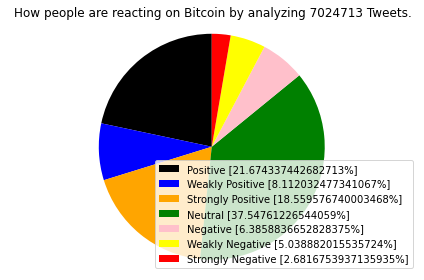

In [15]:
labels = ['Positive [' + str(perc_pos) + '%]', 'Weakly Positive [' + str(perc_wpos) + '%]','Strongly Positive [' + str(perc_spos) + '%]', 'Neutral [' + str(perc_neu) + '%]',
          'Negative [' + str(perc_neg) + '%]', 'Weakly Negative [' + str(perc_wneg) + '%]', 'Strongly Negative [' + str(perc_sneg) + '%]']
sizes = [perc_pos, perc_wpos, perc_spos, perc_neu, perc_neg, perc_wneg, perc_sneg]
colors = ['black','blue','orange', 'green', 'pink','yellow','red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="lower right")
plt.title('How people are reacting on Bitcoin by analyzing ' + str(len(dataset)) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [16]:
pos_string = " "
for i in tqdm(range(len(dataset))):
    if dataset['compound'][i] > 0:
        pos_string = pos_string + dataset['Text'][i]

100%|█████████████████████████████████████████████████████████████████████| 7024713/7024713 [33:57:13<00:00, 57.47it/s]


In [ ]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

Wordcloud of the most common words included in the text of tweets that carry positive sentiment 

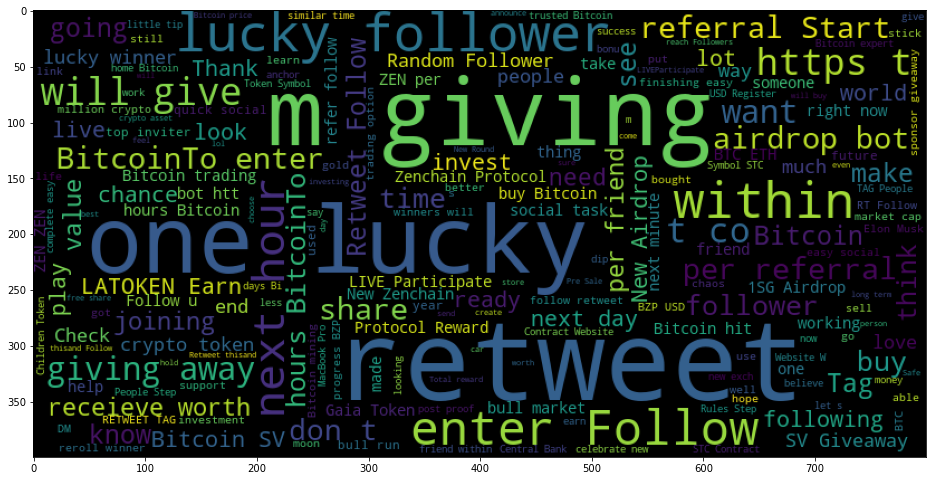

In [18]:
plt.figure(figsize=(16, 12))
wordcloud.generate(pos_string)
plt.imshow(wordcloud);

In [19]:
neg_str = " "
for i in tqdm(range(len(dataset))):
    if dataset['compound'][i] < 0:
        neg_str = neg_str + dataset['Text'][i]

100%|█████████████████████████████████████████████████████████████████████| 7024713/7024713 [2:44:25<00:00, 712.07it/s]


Wordcloud of the most common words included in the text of tweets that carry negative sentiment 

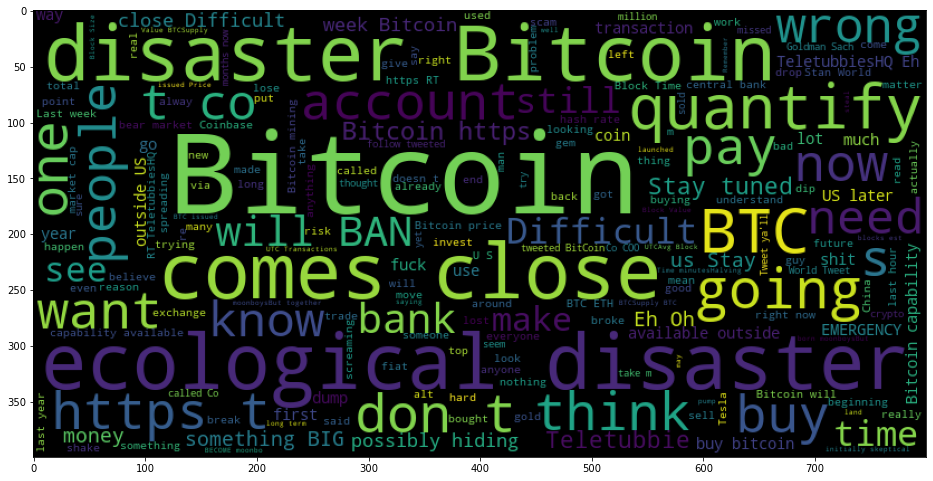

In [20]:
plt.figure(figsize=(16, 12))
wordcloud.generate(neg_str)
plt.imshow(wordcloud);

We make the round the CreatedAt column to the hour, for example 15:23 goes to 15:00 

In [22]:
def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + timedelta(0,rounding-seconds,-dt.microsecond)

In [23]:
dataset['FlooredDatatime'] = 0
for i in tqdm(range(len(dataset))):
    dataset['FlooredDatatime'][i] = roundTime(datetime.strptime(dataset['CreatedAt'][i],'%a %b %d %H:%M:%S +0000 %Y'),60*60)

  0%|                                                                                      | 0/7024713 [00:00<?, ?it/s]<ipython-input-23-988a9e95002f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FlooredDatatime'][i] = roundTime(datetime.strptime(dataset['CreatedAt'][i],'%a %b %d %H:%M:%S +0000 %Y'),60*60)
C:\Users\Fivos\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|████████████████████████████████████████████████████████████████████| 7024713/7024713 [105:53:54<00:00, 18.43it/s]


For the entirety of the dataset

In [24]:
dataset.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_sentiment_whole.csv')

In [25]:
hourly_sum = dataset.groupby(['FlooredDatatime']).sum()['score']

In [26]:
hourly_sum

FlooredDatatime
2021-03-20 11:00:00    3.020581e+09
2021-03-20 12:00:00    2.030380e+10
2021-03-20 13:00:00    1.605324e+10
2021-03-20 14:00:00   -1.063602e+12
2021-03-20 15:00:00   -2.185849e+10
                           ...     
2021-04-20 11:00:00    1.099503e+11
2021-04-20 12:00:00    1.463393e+11
2021-04-20 13:00:00   -2.548214e+12
2021-04-20 14:00:00   -7.350909e+10
2021-04-20 15:00:00    2.184910e+10
Name: score, Length: 715, dtype: float64

In [27]:
historical_data = pd.read_excel(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\Historical Price Data\BTC_Price_20_March_until_20_April.xlsx',header= 0)

In [28]:
historical_data

Timestamp     Open     High      Low    Close  Volume (BTC)  \
0     2021-03-19 00:00:00  57640.0  57674.5  57190.0  57199.6        105.16   
1     2021-03-19 00:15:00  57223.9  57237.5  56243.1  56611.3        250.68   
2     2021-03-19 00:30:00  56611.3  56840.6  56345.0  56835.0         72.01   
3     2021-03-19 00:45:00  56835.0  56973.0  56723.5  56854.1         35.71   
4     2021-03-19 01:00:00  56854.1  57138.9  56668.0  57000.0        113.70   
...                   ...      ...      ...      ...      ...           ...   
3084  2021-04-20 14:00:00  56350.0  56500.0  56214.6  56257.6         57.58   
3085  2021-04-20 14:15:00  56217.7  56301.0  56031.2  56116.4         52.95   
3086  2021-04-20 14:30:00  56082.7  56085.0  55501.1  55638.1         92.67   
3087  2021-04-20 14:45:00  55639.5  55648.8  55277.3  55392.7         90.41   
3088  2021-04-20 15:00:00  55392.5  55622.8  55316.4  55389.4         43.38   

      Volume (Currency)  Weighted Price  
0            6048384.85        57517.70  
1           14202051.11        56654.45  
2            4080828.68        56668.41  
3            2031221.17        56879.27  
4            6470128.44        56907.39  
...                 ...             ...  
3084         3246593.02        56386.22  
3085         2972725.37        56141.59  
3086         5170162.43        55791.20  
3087         5019113.98        55512.96  
3088         2406600.12        55478.21  

[3089 rows x 8 columns]

In [29]:
fig = go.Figure(data=[go.Candlestick(x=historical_data['Timestamp'],
                open=historical_data['Open'],
                high=historical_data['High'],
                low=historical_data['Low'],
                close=historical_data['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [30]:
hourly_price = []
for i in range(0,len(historical_data),4):
    hourly_price.append(historical_data['Close'][i])

In [31]:
date_range = []
for i in range(0,len(historical_data),4):
    date_range.append(historical_data['Timestamp'][i])

In [32]:
date_range

[datetime.datetime(2021, 3, 19, 0, 0),
 datetime.datetime(2021, 3, 19, 1, 0),
 datetime.datetime(2021, 3, 19, 2, 0),
 datetime.datetime(2021, 3, 19, 3, 0),
 datetime.datetime(2021, 3, 19, 4, 0),
 datetime.datetime(2021, 3, 19, 5, 0),
 datetime.datetime(2021, 3, 19, 6, 0),
 datetime.datetime(2021, 3, 19, 7, 0),
 datetime.datetime(2021, 3, 19, 8, 0),
 datetime.datetime(2021, 3, 19, 9, 0),
 datetime.datetime(2021, 3, 19, 10, 0),
 datetime.datetime(2021, 3, 19, 11, 0),
 datetime.datetime(2021, 3, 19, 12, 0),
 datetime.datetime(2021, 3, 19, 13, 0),
 datetime.datetime(2021, 3, 19, 14, 0),
 datetime.datetime(2021, 3, 19, 15, 0),
 datetime.datetime(2021, 3, 19, 16, 0),
 datetime.datetime(2021, 3, 19, 17, 0),
 datetime.datetime(2021, 3, 19, 18, 0),
 datetime.datetime(2021, 3, 19, 19, 0),
 datetime.datetime(2021, 3, 19, 20, 0),
 datetime.datetime(2021, 3, 19, 21, 0),
 datetime.datetime(2021, 3, 19, 22, 0),
 datetime.datetime(2021, 3, 19, 23, 0),
 datetime.datetime(2021, 3, 20, 0, 0),
 datetime.d

We find the i in order to start the graph of hourly price - hourly sum of sentiments at the same place (to find the first common FlooredDatatime)

In [34]:
#to find the i in order to start the graphs at the same place
for i in range(len(date_range)):
    if date_range[i] ==  pd.Timestamp('2021-03-20 11:00:00'):
        print(i)

35


In [35]:
slided_date_range = date_range[35:]
slided_date_range

[datetime.datetime(2021, 3, 20, 11, 0),
 datetime.datetime(2021, 3, 20, 12, 0),
 datetime.datetime(2021, 3, 20, 13, 0),
 datetime.datetime(2021, 3, 20, 14, 0),
 datetime.datetime(2021, 3, 20, 15, 0),
 datetime.datetime(2021, 3, 20, 16, 0),
 datetime.datetime(2021, 3, 20, 17, 0),
 datetime.datetime(2021, 3, 20, 18, 0),
 datetime.datetime(2021, 3, 20, 19, 0),
 datetime.datetime(2021, 3, 20, 20, 0),
 datetime.datetime(2021, 3, 20, 21, 0),
 datetime.datetime(2021, 3, 20, 22, 0),
 datetime.datetime(2021, 3, 20, 23, 0),
 datetime.datetime(2021, 3, 21, 0, 0),
 datetime.datetime(2021, 3, 21, 1, 0),
 datetime.datetime(2021, 3, 21, 2, 0),
 datetime.datetime(2021, 3, 21, 3, 0),
 datetime.datetime(2021, 3, 21, 4, 0),
 datetime.datetime(2021, 3, 21, 5, 0),
 datetime.datetime(2021, 3, 21, 6, 0),
 datetime.datetime(2021, 3, 21, 7, 0),
 datetime.datetime(2021, 3, 21, 8, 0),
 datetime.datetime(2021, 3, 21, 9, 0),
 datetime.datetime(2021, 3, 21, 10, 0),
 datetime.datetime(2021, 3, 21, 11, 0),
 datetime.

In [36]:
slided_hourly_price = hourly_price[35:]
slided_hourly_price

[58688.1,
 59130.0,
 59480.0,
 58982.6,
 59570.0,
 58950.1,
 59110.0,
 59246.6,
 59259.4,
 58800.1,
 58643.6,
 58734.1,
 58400.0,
 58330.0,
 58420.8,
 58011.2,
 57685.3,
 57801.1,
 57083.2,
 57122.4,
 57328.3,
 57227.4,
 57185.3,
 56179.4,
 56008.4,
 56060.4,
 56700.7,
 57266.2,
 57484.4,
 57229.9,
 57157.6,
 57306.9,
 57680.0,
 57919.6,
 57760.2,
 57893.3,
 57237.8,
 57397.5,
 56637.0,
 56622.1,
 57265.9,
 57619.2,
 57541.5,
 57716.1,
 57611.9,
 57525.4,
 57200.9,
 58027.4,
 58014.3,
 57441.1,
 57327.9,
 57191.2,
 56968.6,
 57172.5,
 56724.9,
 56949.0,
 55925.9,
 55962.2,
 54948.6,
 54527.9,
 54725.5,
 54599.8,
 54663.1,
 54994.1,
 54562.7,
 54589.3,
 54111.0,
 53244.9,
 53619.8,
 54021.5,
 54377.6,
 54633.9,
 54640.0,
 55030.8,
 55248.8,
 55300.0,
 55074.7,
 54950.1,
 55650.6,
 55671.8,
 55465.5,
 54784.4,
 54422.4,
 54671.7,
 54677.5,
 54138.8,
 53949.5,
 54576.5,
 54323.3,
 54351.2,
 53967.8,
 53817.3,
 55463.6,
 55907.3,
 56631.4,
 56286.0,
 56414.0,
 56904.0,
 56880.0,
 56865.0,


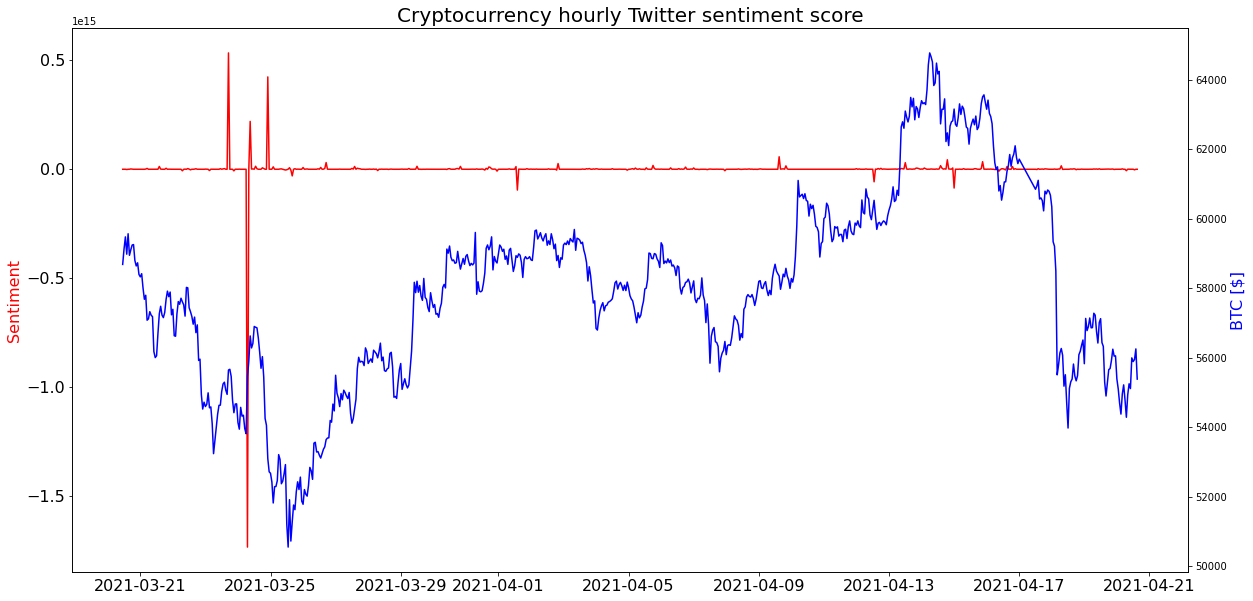

In [37]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Cryptocurrency hourly Twitter sentiment score", fontsize=20)
ax1.tick_params(labelsize=16)
ax2 = ax1.twinx()
ax1.plot_date(hourly_sum.index, hourly_sum, 'r-')
ax2.plot_date(slided_date_range, slided_hourly_price, 'b-')

ax1.set_ylabel("Sentiment", color='r', fontsize=16)
ax2.set_ylabel("BTC [$]", color='b', fontsize=16)


plt.show()

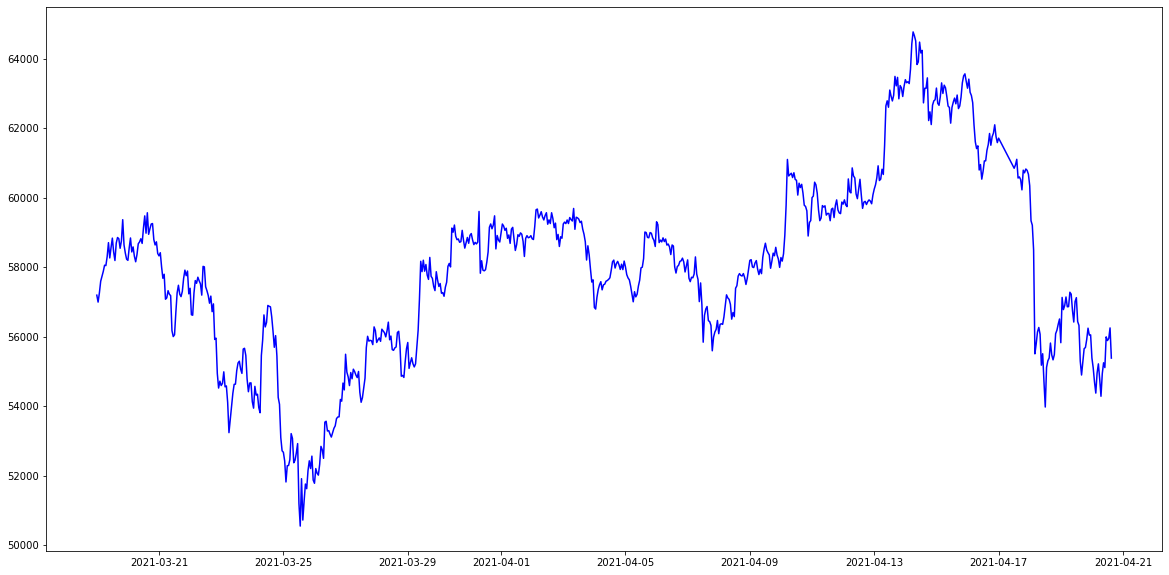

In [38]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.plot_date(date_range, hourly_price, 'b-')

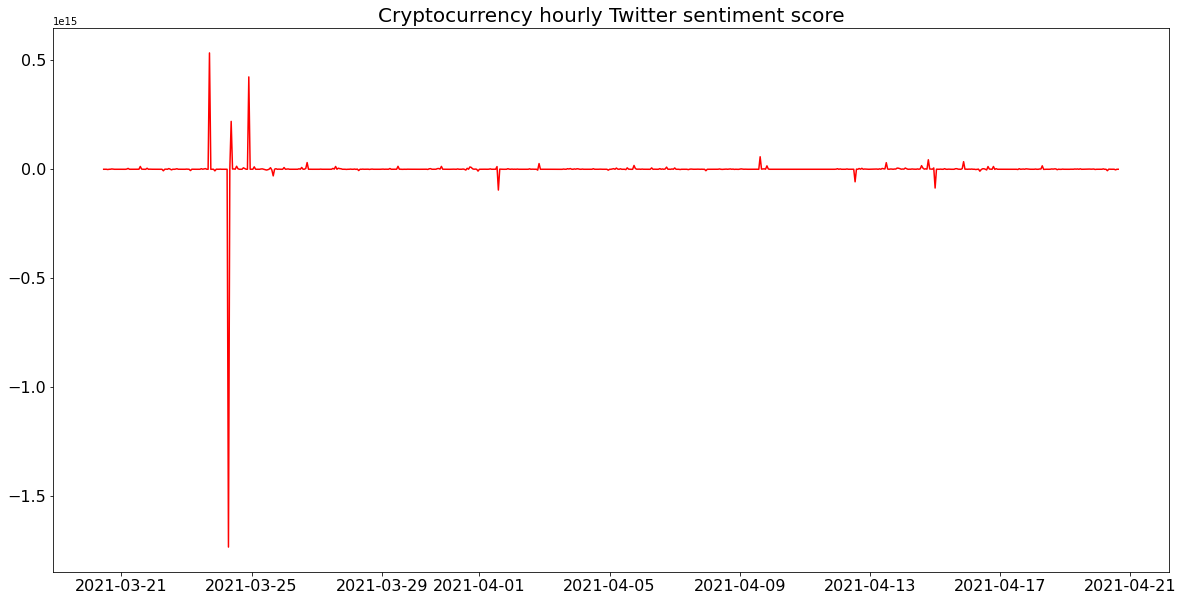

In [39]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Cryptocurrency hourly Twitter sentiment score", fontsize=20)
ax1.tick_params(labelsize=16)
ax1.plot_date(hourly_sum.index, hourly_sum, 'r-')

In [41]:
hourly_compound = dataset.groupby(['FlooredDatatime']).sum()['compound']
hourly_compound

FlooredDatatime
2021-03-20 11:00:00    1280.5129
2021-03-20 12:00:00    2398.7881
2021-03-20 13:00:00    2649.2467
2021-03-20 14:00:00    2277.3911
2021-03-20 15:00:00    2578.5063
                         ...    
2021-04-20 11:00:00    1736.8923
2021-04-20 12:00:00    2053.0606
2021-04-20 13:00:00    1877.5131
2021-04-20 14:00:00    1957.2659
2021-04-20 15:00:00    1197.3949
Name: compound, Length: 715, dtype: float64

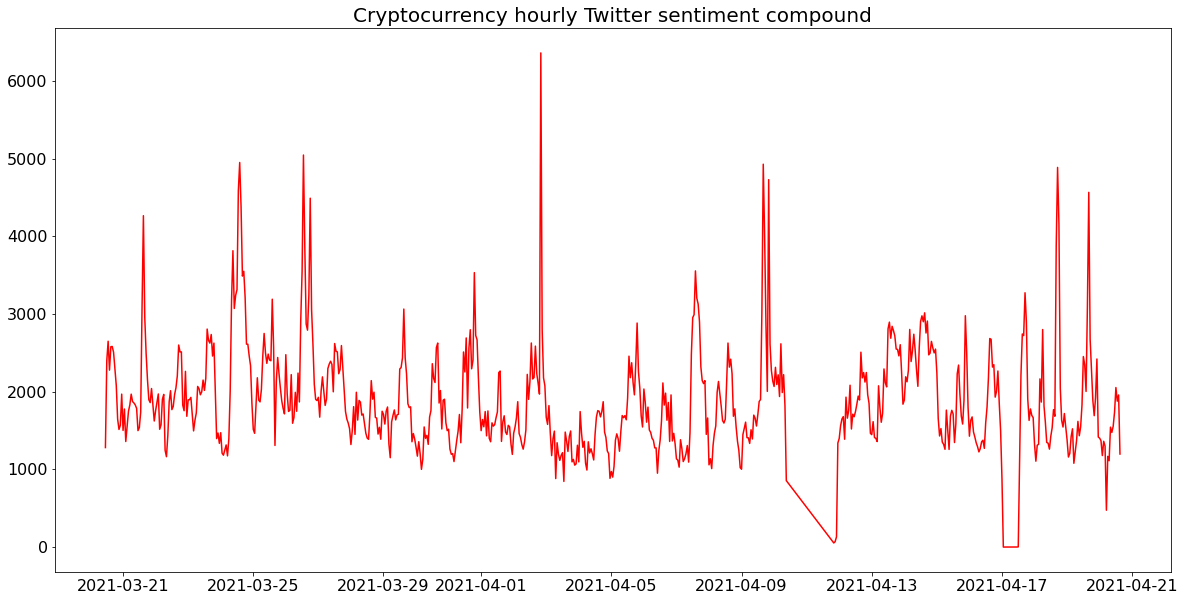

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Cryptocurrency hourly Twitter sentiment compound", fontsize=20)
ax.tick_params(labelsize=16)
ax.plot_date(hourly_compound.index, hourly_compound, 'r-')
plt.show()